<a href="https://colab.research.google.com/github/prince001996/Tensorflow-2.0-learning-/blob/master/Tensorlflow_2_0_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [0]:
type(train_images)

numpy.ndarray

In [0]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

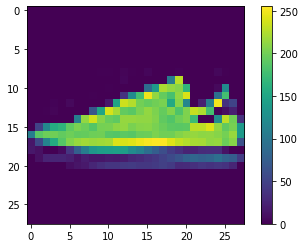

In [0]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=6)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4945 - accuracy: 0.8250
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3717 - accuracy: 0.8663
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8776
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3137 - accuracy: 0.8844
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2946 - accuracy: 0.8919
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2798 - accuracy: 0.8960


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8814
Test accuracy: 0.8813999891281128


In [0]:
predictions = model.predict(test_images)

In [0]:
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

9
Ankle boot


Pick a number: 45


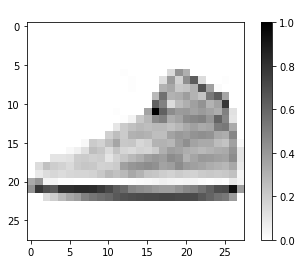

In [0]:
 COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)